# Excercises Electric Machinery Fundamentals
## Chapter 5

## Problem 5-1

**Note:** *You should first click on "`Cell` &rarr; `Run All`" in order that the plots get generated.*

In [1]:
%pylab notebook
%precision %.4g

Populating the interactive namespace from numpy and matplotlib


'%.4g'

### Description

A 480-V, 60 Hz, 400-hp 0.8-PF-leading eight-pole $\Delta$-connected synchronous motor has a synchronous
reactance of $0.6\,\Omega$ and negligible armature resistance. Ignore its friction, windage, and core losses for the
purposes of this problem. Assume that $|\vec{E}_A|$ is directly proportional to the field current $I_F$ (in other
words, assume that the motor operates in the linear part of the magnetization curve), and that $|\vec{E}_A| = 480\,V$ when $I_F = 4\,A$.

In [2]:
Vt   = 480         # [V]
PF   =   0.8
fse  =  60         # [Hz]
p    =   8
Pout = 400 * 746   # [W] using the official "electrical horsepower" conversion
Xs   =   0.6       # [Ohm]

#### (a)
 
 * What is the speed of this motor?
 
#### (b)
If this motor is initially supplying 400 hp at 0.8 PF lagging.

 * What are the magnitudes and angles of $\vec{E}_A$ and $\vec{I}_A$ ?
 
#### (c)
 
 * How much torque is this motor producing? 
 * What is the torque angle $\delta$ ? 
 * How near is this value to the maximum possible induced torque of the motor for this field current setting?
 
#### (d)
If $|\vec{E}_A|$ is increased by 30 percent.

 * What is the new magnitude of the armature current? 
 * What is the motor’s new power factor?

#### (e)

 * Calculate and plot the motor’s V-curve for this load condition.

### SOLUTION

#### (a)
The speed of this motor is given by:

$$n_m = \frac{120f_{se}}{P}$$

In [3]:
n_m = 120 * fse / p
print('''
n_m = {:.0f} r/min
==============='''.format(n_m))


n_m = 900 r/min


#### (b)
If losses are being ignored, the output power is equal to the input power. This situation is shown in the phasor diagram below:

<img src="figs/Problem_5-01.jpg" width="60%">

The line current flow under these circumstances is:

$$I_L = \frac{P}{\sqrt{3}V_T PF}$$

In [4]:
Pin = Pout
il = Pin / (sqrt(3) * Vt * PF)
il # [A]

448.6

Because the motor is $\Delta$-connected, the corresponding phase current is:

In [5]:
ia = il / sqrt(3)
ia # [A]

259

The angle of the current is:

In [6]:
Ia_angle = -arccos(PF)
Ia_angle /pi *180 # [degrees]

-36.87

In [7]:
Ia = ia * (cos(Ia_angle) + sin(Ia_angle)*1j)
print('Ia = {:.0f} A ∠{:.2f}°'.format(abs(Ia), Ia_angle / pi *180))

Ia = 259 A ∠-36.87°


The internal generated voltage $\vec{E}_A$ is:
$$\vec{E}_A = \vec{V}_\phi - jX_S\vec{I}_A$$

In [8]:
EA = Vt - Xs * 1j * Ia
EA_angle = arctan(EA.imag/EA.real)
print('''
EA = {:.0f} V ∠{:.1f}°
=================='''.format(abs(EA), EA_angle/pi*180))


EA = 406 V ∠-17.8°


#### (c)
The induced torque is:

$$\tau_\text{ind} = \frac{P_\text{out}}{\omega_m}$$

In [9]:
w_m = n_m * (1.0 / 60.0) * (2.0*pi/1.0)
tau_ind = Pout / w_m
print('''
tau_ind = {:.0f} Nm
================='''.format(tau_ind))


tau_ind = 3166 Nm


The maximum possible induced torque for the motor at this field setting is the maximum possible power divided by $\omega_m$:

$$\tau_\text{ind,max} = \frac{3V_\phi E_A}{\omega_mX_S}$$

In [10]:
tau_ind_max = (3*Vt*abs(EA)) / (w_m * Xs)
print('''
tau_ind_max = {:.0f} Nm
======================'''.format(tau_ind_max))


tau_ind_max = 10345 Nm


The current operating torque is about

In [11]:
tau_ind/tau_ind_max

0.3061

times the maximum possible torque.

#### (d)
If the magnitude of the internal generated voltage $E_A$ is increased by 30%, the new torque angle
can be found from the fact that $E_A\sin{\delta} \propto P =$ constant.

In [12]:
Ea_2 = 1.30 * abs(EA)
Ea_2 # [V]

528.1

$$\delta_2 = \arcsin\left(\frac{E_{A1}}{E_{A2}}\sin{\delta_1}\right)$$

In [13]:
delta_1 = EA_angle
delta_2 = arcsin(abs(EA) / Ea_2 * sin(delta_1))
delta_2/pi *180 # [degrees]

-13.62

The new armature current is:
$$\vec{I}_{A2} = \frac{\vec{V}_\phi - \vec{E}_{A2}}{jX_S}$$

In [14]:
EA2 = Ea_2 * (cos(delta_2)+sin(delta_2)*1j)
Ia_2 = (Vt - EA2) / (Xs*1j)
Ia_2_angle = arctan(Ia_2.imag/Ia_2.real)
PF2 = cos(Ia_2_angle)
print('''
Ia_2 = {:.0f} A ∠{:.2f}°
====================
PF2  = {:.3f}
============'''.format(abs(Ia_2), Ia_2_angle/pi*180, PF2))


Ia_2 = 215 A ∠14.98°
PF2  = 0.966


#### (e)
A Python program to calculate and plot the motor’s V-curve is shown below:

Initialize values:

In [15]:
Ea_plot = linspace(0.90, 1.70, 81)  * EA

Calculate $\delta_2$

In [16]:
delta_plot = arcsin(abs(EA) / Ea_plot * sin(delta_1))

Calculate the phasor $E_A$

In [17]:
EA_plot = Ea_plot * (cos(delta_plot)+sin(delta_plot)*1j)

Calculate $I_A$

In [18]:
Ia_plot = (Vt - Ea_plot) / (Xs*1j)

Plot the v-curve

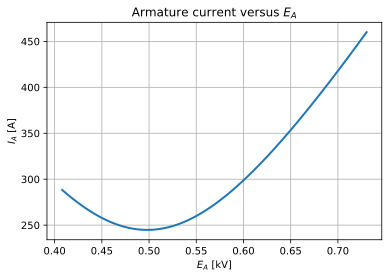

In [19]:
title(r'Armature current versus $E_A$')
xlabel(r'$E_A$ [kV]')
ylabel(r'$I_A$ [A]')
plot(abs(EA_plot)/1000,abs(Ia_plot),  linewidth = 2)
grid()